In [3]:
import pandas as pd
import matplotlib.pyplot as plt


D:\conda\envs\tesi3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


### Utility functions 

In [8]:
def get_loss_by_model_k(model, dataset, k, measure = "loss"):
    df = pd.read_csv("results/training/file_loss.txt",header=0)
    df = df.loc[df['dataset']==dataset]
    df = df.loc[df['model']==model]
    df = df.loc[df['k']==k]
    return df[measure].values[0]

def get_k_best_model(model, dataset):
    df = pd.read_csv("results/training/file_result.txt",header=0)
    idx = df.groupby(["dataset", "model"])['train_score'].idxmax()
    df = df.loc[idx]
    df = df.loc[df['dataset']==dataset]
    df = df.loc[df['model']==model]
    return df["k"].values[0]
    


choose the model to compare and the dataset from the list

In [14]:
models = ["pad_qSLP_1",
          "pad_qSLP_2",
          "pad_qSLP_3",
          "sdq_qSLP_1",
          "sdq_qSLP_2",
          "sdq_qSLP_3",
          "qNNC_v1","qNNC_v2"]
datasets = ["iris01","MNIST09", "MNIST38",  "iris12", "iris02"]
dataset = datasets[0]
# choose between accuracy and loss, accuracy is available for qSLP while loss is available for all parametric models
measure= "loss"

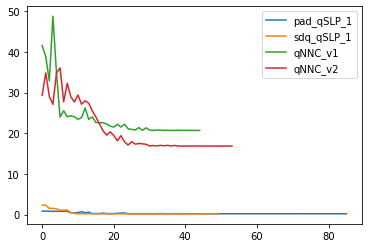

In [15]:
for model in models:
    k = get_k_best_model(model, dataset)
    plt.plot(eval(get_loss_by_model_k(model, dataset, k, measure=measure)),label= model)
plt.legend()
plt.show()


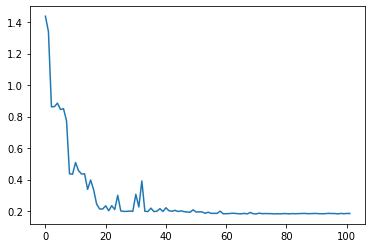